In [3]:
import time
import numpy as np
import random
from matplotlib import pyplot as plt

from peak_finder import *

%load_ext autoreload
%autoreload 2

# Peak finding: asymptotic complexity

## Basic algo: walking the array

This just checks element by element, from the start, until it finds a local peak.

In [4]:
# check on one array
arr = np.array([0,2,1,4,5,6])

find_peak_walking(arr)

1

In [5]:
# complexity: tests on increasing input size

n = 1000
arr = np.random.randint(1, high=n, size=n)

In [6]:
%%time

_ = find_peak_walking(arr)

CPU times: user 12 µs, sys: 1 µs, total: 13 µs
Wall time: 20 µs


### Compute the complexity with a random array

The time the algo takes will be averaged over 100 copies of a random array of fixed size.

In [7]:
d = {}

sizes = [10,100,1000,10000,100000, 1000000, 10000000]
for n in sizes:
    l_ = []
    for i in range(100):
        start_time = time.time()
        arr = np.random.randint(1, high=n, size=n)
        find_peak_walking(arr)
        l_.append(time.time() - start_time)
    d[n] = np.mean(l_)

In [8]:
#d

### Plot the asymptotic complexity

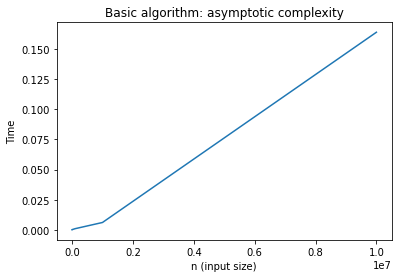

In [10]:
plt.plot(d.keys(), d.values())

plt.title('Basic algorithm: asymptotic complexity')
plt.xlabel('n (input size)')
plt.ylabel('Time')
plt.show()

# Better algo: recursive with binary search approach

This approach looks at the element in the middle of the array and checks if it's a local max. If it isn't, it splits the array in two and does the same on a half of it, then proceeds recursively.

In [12]:
# check on one array
arr = np.array([0,2,1,4,5,6])

find_peak_binary_search(arr)

6

In [13]:
# check on one array
arr = np.array([2,1])

find_peak_binary_search(arr)

2

In [14]:
%%time

_ = find_peak_binary_search(arr)

CPU times: user 10 µs, sys: 1e+03 ns, total: 11 µs
Wall time: 11.9 µs


### Run both algos on the same (random) array of fixed size

This is done with arrays of increasing size.

In [15]:
d_walk, d_bins = {}, {}

sizes = [100,1000,10000,100000, 1000000, 10000000]
for n in sizes:
    l_walk, l_bin = [], []
    for i in range(100):
        start_time = time.time()
        
        arr = np.random.randint(1, high=n, size=n)
        
        find_peak_walking(arr)
        t_walk = time.time()
        l_walk.append(t_walk - start_time)
        
        find_peak_binary_search(arr)
        l_bin.append(time.time() - t_walk)
        
    d_walk[n] = np.mean(l_walk)
    d_bins[n] = np.mean(l_bin)

### Plot the asymptotic complexity of both

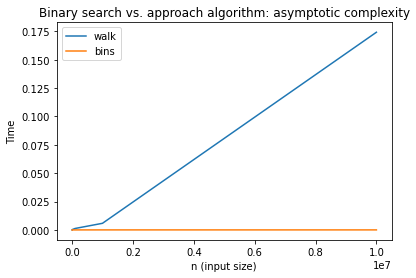

In [16]:
plt.plot(d_walk.keys(), d_walk.values(), label='walk')
plt.plot(d_walk.keys(), d_bins.values(), label='bins')

plt.title('Binary search vs. approach algorithm: asymptotic complexity')
plt.xlabel('n (input size)')
plt.ylabel('Time')
plt.legend()
plt.show()

In [17]:
d_walk, d_bins

({100: 1.704692840576172e-05,
  1000: 6.131887435913086e-05,
  10000: 0.00033766984939575194,
  100000: 0.0012755036354064942,
  1000000: 0.005836184024810791,
  10000000: 0.17426934003829955},
 {100: 3.6478042602539064e-06,
  1000: 4.4012069702148436e-05,
  10000: 1.5006065368652343e-05,
  100000: 8.983612060546875e-06,
  1000000: 2.1715164184570312e-05,
  10000000: 2.1617412567138672e-05})

### Do the same but in the worst case scenario

That is, with arrays where the max is always at the end - no need to average here.

In [37]:
d_walk, d_bins = {}, {}

sizes = [100,1000,10000,100000, 1000000, 10000000]
for n in sizes:

    start_time = time.time()

    arr = range(n)

    find_peak_walking(arr)
    t_walk = time.time()
    d_walk[n] = t_walk - start_time

    find_peak_binary_search(arr)
    d_bins[n] = time.time() - t_walk

In [38]:
d_walk, d_bins

({100: 5.602836608886719e-05,
  1000: 0.0006148815155029297,
  10000: 0.008938789367675781,
  100000: 0.12904024124145508,
  1000000: 0.6401329040527344,
  10000000: 7.139518976211548},
 {100: 1.0013580322265625e-05,
  1000: 1.9073486328125e-05,
  10000: 7.724761962890625e-05,
  100000: 3.886222839355469e-05,
  1000000: 4.029273986816406e-05,
  10000000: 7.677078247070312e-05})

In [39]:
np.log2(1000)

9.965784284662087

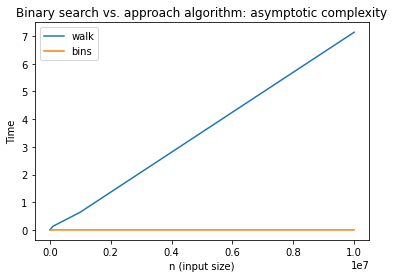

In [45]:
plt.plot(d_walk.keys(), d_walk.values(), label='walk')
plt.plot(d_walk.keys(), d_bins.values(), label='bins')

plt.title('Binary search vs. approach algorithm: asymptotic complexity')
plt.xlabel('n (input size)')
plt.ylabel('Time')
plt.legend()
plt.show()

In [42]:
{d_walk[n]* np.log2(n) for n in d_walk}

{0.00037224440684248454,
 0.006127776544128304,
 0.11877606213905047,
 2.1433120137551627,
 12.758852870607688,
 166.0187806974102}

In [43]:
d_bins

{100: 1.0013580322265625e-05,
 1000: 1.9073486328125e-05,
 10000: 7.724761962890625e-05,
 100000: 3.886222839355469e-05,
 1000000: 4.029273986816406e-05,
 10000000: 7.677078247070312e-05}